### carregamos o dataset

In [1]:
import pandas as pd 

resenhas = pd.read_csv('imdb-reviews-pt-br.csv')

# sera necessario limitar o numero de resenhas - 50% dos dados
resenhas = resenhas.sample(frac = 0.50).reset_index(drop = True)

troca = {
    'neg' : 0,
    'pos' : 1
}

resenhas['sentiment_b'] = resenhas.sentiment.map(troca)
resenhas = resenhas.drop(columns = ["id" , "text_en", "sentiment"], axis = 1)

all_texts = [text for text in resenhas.text_pt]
all_ = ' '.join(all_texts)

## usaremos o NLTK

#### pip install nltk

## tokenização
### extrai cada palavra das resenhas ( separadas por espaço )

In [2]:
import nltk
from nltk import tokenize

tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

# como o método WordPunctTokenizer nós evitamos que palavras seguidas de pontuação 
# sejam consideradas diferentes.

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 10)

most_frequency

,Palavra,Frequência
44,de,209490
25,que,162280
46,e,150587
136,o,122422
13,um,108317
41,a,105240
23,é,96455
17,em,66425
48,uma,65422
35,não,64108


#### pelo resultado ... 
#### é notavel que as palavras mais frequentes 
#### sao palavras que nao agregam a classificacao
#### e sao irrelevantes

## criamos um grafico de pareto

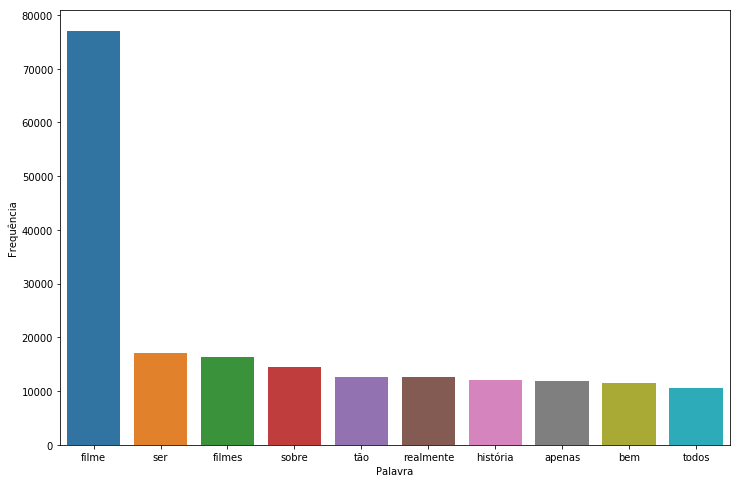

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.barplot(
    data = most_frequency,
    x = "Palavra",
    y = "Frequência")
plt.show()

## Eliminando as stop words ( palavras irrelevantes )

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [6]:
import re

# tudo lowercase
for index, row in resenhas.iterrows():
    resenhas.at[index,'text_pt'] = row['text_pt'].lower()
    
# elimina as stop words
for index, row in resenhas.iterrows():
    # retorna apenas as palavras
    # elimina aos pnts de sinalizacao
    words = re.findall(r"[\w']+", row['text_pt'])
    temp = [ws for ws in words if ws not in stop_words]
    resenhas.at[index,'text_pt'] = ' '.join(temp)

In [7]:
# atualiza a variavel

all_texts = [text for text in resenhas.text_pt]
all_ = ' '.join(all_texts)

## Cria o grafico de Pareto para o novo DataFrame

       Palavra  Frequência
12       filme       77091
87         ser       17018
96      filmes       16282
164      sobre       14490
10         tão       12676
80   realmente       12569
73    história       11978
16      apenas       11954
122        bem       11561
39       todos       10599


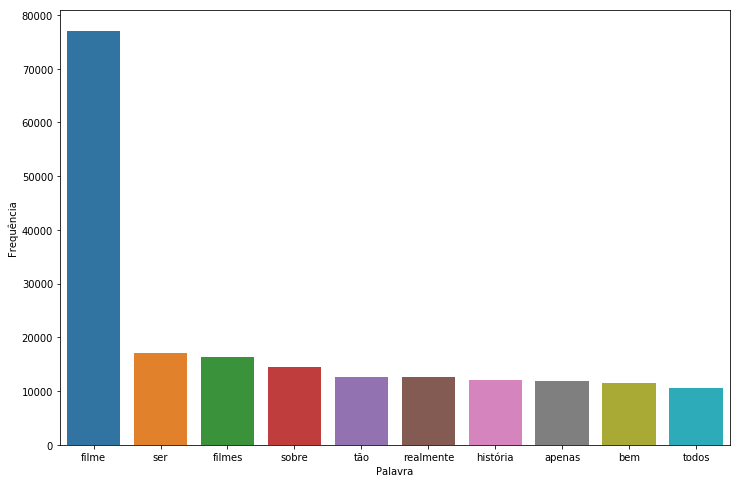

In [8]:
tokenizador = tokenize.WhitespaceTokenizer()
tokens = tokenizador.tokenize(all_)

frequencia = nltk.FreqDist(tokens)

import pandas as pd
df_frequencia = pd.DataFrame({
    "Palavra" : list(frequencia.keys()),
    "Frequência" : list(frequencia.values())
})

## mostra as palavras de maior frequencia
most_frequency = df_frequencia.nlargest(
    columns = "Frequência" , 
    n = 10)

print(most_frequency)

plt.figure(figsize = (12,8))
ax = sns.barplot(
    data = most_frequency,
    x = "Palavra",
    y = "Frequência")
plt.show()

#### Pelo resultado é notavel que podemos melhorar ainda mais 
#### o dataset, eliminando ads palavras 'filme' ...

## Cria a WordCloud para Sentimento Positivo

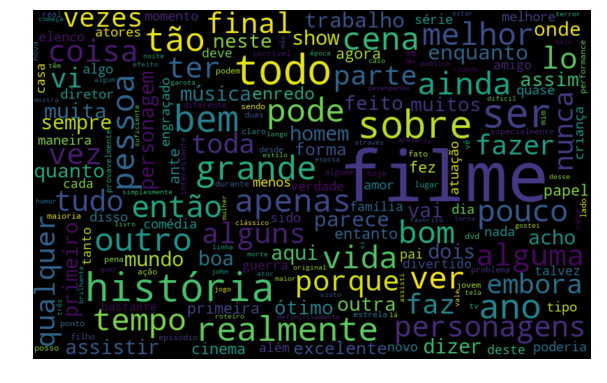

In [9]:
# fixa a imagem no notebook
%matplotlib inline

from wordcloud import WordCloud
resenhas_positivas = resenhas.query("sentiment_b == 1")
all_texts_pos = [text for text in resenhas_positivas.text_pt]
all_pos = ' '.join(all_texts_pos)
cloud_words_pos = WordCloud(
    width = 800 , height = 500 , 
           max_font_size = 100,
                       collocations = False).generate(all_pos )
plt.figure(figsize = (10,7))
plt.imshow(cloud_words_pos , interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Efetua a classificacao com os dataset sem as stop words

In [10]:
# cria o bag of words
from sklearn.feature_extraction.text import CountVectorizer

vetorizador = CountVectorizer(lowercase = False , max_features = 50)
bag_of_words = vetorizador.fit_transform(resenhas.text_pt)

# estratifica os dados
from sklearn.model_selection import train_test_split

SEED = 20
treino, teste, classe_treino, classe_teste = train_test_split(
    bag_of_words,
    resenhas.sentiment_b,
    random_state = SEED)

# realiza a classificacao
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(solver = 'lbfgs')
modelo.fit(treino,classe_treino)
modelo.score(teste,classe_teste)

0.6912502021672328